In [1]:
# This is from Will's tutorial notebook
# It has less helpful text, but can be used, step by step, to produce the yaml, fits, and pickle files for each flight

In [1]:
## First import general packages for running python analysis:
import os, h5py, datetime,pytz,pickle, yaml
import numpy as np
from matplotlib.pyplot import *
from matplotlib import pyplot as plt

## Then import the beamcals module packages and initialize 'gbosite' class:
from beamcals import corr, concat, drone, bicolog
import beamcals.plotting_utils as pu
import beamcals.fitting_utils as fu
import beamcals.geometry_utils as gu
import beamcals.time_utils as tu
from beamcals.sites import site
import beamcals.reduce_ccclass as rc
gbosite=site.site('../beamcals/beamcals/sites/GBO_config.npz')

In [10]:
## Let's pick a file that seems like it might not have anything associated with it

#cdat = '20210824T143602Z'
cdat = '20210824T143047Z'

20210824T143114Z /hirax/GBO_Aug_2021/TONE_ACQ/20210824T143047Z_yale_drone/corr/20210824T143114Z/ /hirax/GBO_Aug_2021/TONE_ACQ/digital_gains/20210824T143047Z_yale_drone_yale_digitalgain/
Initializing drone data via datcon_csv routine: FLY490.csv
  --> Skipping rows 1 to 499 to eliminate NAN values
  --> Attempting to load position data from RTK
    --> RTK data contains 17301/17301 non-nan values
Timestamp interpolation succeeded
  --> generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
  --> generating dish and receiver line of sight coordinates.
DONE reading in drone data
2021-08-24 14:17:15.299000+00:00 2021-08-24 14:46:11.251000+00:00
plotting drone coordinates for all time samples:
overplotting drone coordinates for t_cut samples: [0:-1]


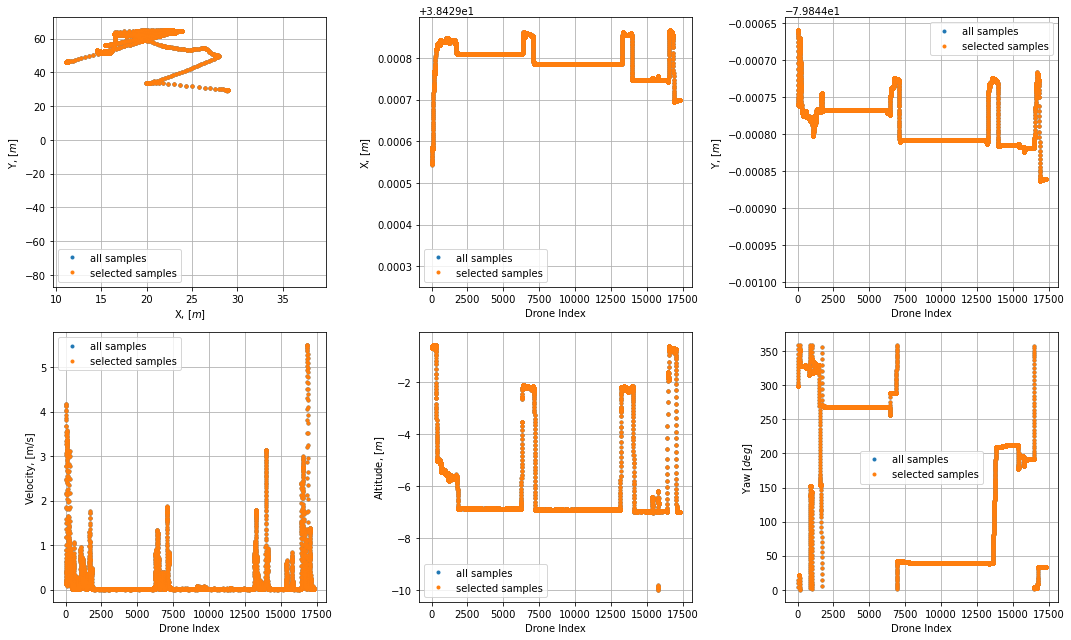

In [4]:
# Read the yaml for the flight you're interested in
fly = '490'
if int(fly) < 537:
    mdir='/hirax/GBO_Aug_2021/TONE_ACQ/'+cdat+'_yale_drone/corr/' # August 2021
    gaindir='/hirax/GBO_Aug_2021/TONE_ACQ/digital_gains/'+cdat+'_yale_drone_yale_digitalgain/' # August 2021
else:
    mdir='/hirax/GBO_Oct_2021/TONE_ACQ/'+cdat+'_yale_drone/corr/' # Oct 2021
    gaindir='/hirax/GBO_Oct_2021/TONE_ACQ/digital_gains/'+cdat+'_yale_drone_yale_digitalgain/' # Oct 2021

sdir = os.listdir(mdir)[0]
datadir=mdir+sdir+'/'
print(sdir, datadir,gaindir)
    
dronedir='/hirax/all_drone_data/datcon_csv/'
dronetest0825=drone.Drone_Data(Drone_Directory=dronedir,FLYTAG='FLY'+fly+'.csv',site_class=gbosite)

print('DONE reading in drone data')
print(dronetest0825.t_arr_datetime[0], dronetest0825.t_arr_datetime[-1])

pu.Plot_Drone_Coordinates(dronetest0825,coo='xy')#,t_bounds=[tlb,tub])
#pu.Plot_Drone_Coordinates(dronetest0825,coo='xy',t_bounds=[2400,10200])



start time:  2023-07-05 16:25:00.191104
Initializing Correlator Class using:
  --> /hirax/GBO_Aug_2021/TONE_ACQ/20210824T143047Z_yale_drone/corr/20210824T143114Z/
  --> Arrays initialized with shape (22, 256, 1024, 2)
Assigning array values by reading in data files:
  --> Loading File: 0021/0021
  --> Finished. Reshaping arrays.
end time:  2023-07-05 16:25:03.016372


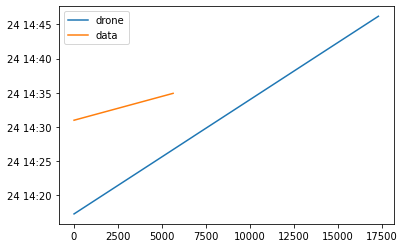

In [11]:
## Combine drone and correlator data
print('start time: ', datetime.datetime.now())

corrtest0825=corr.Corr_Data(Data_Directory=datadir,
                    Gain_Directory=gaindir,site_class=gbosite,
                    crossmap=[])

    
    
print('end time: ', datetime.datetime.now())

# putting checks in one cell now that I know I've mostly figured out the flight/corr file correspondence
# This checks I copied and pasted ok :)

## plot their datetime arrays to check overlap:

plot(dronetest0825.t_arr_datetime,label='drone')
plot(corrtest0825.t_arr_datetime,label='data')
legend()